''Investigating Fandago Movie Ratings''

Walt Hickey supposed, that movie rating at fandago.com was rounded to the high side, not according the mathematics rule. https://fivethirtyeight.com/features/fandango-movies-ratings/

We try to  check ACTUAL and PRESENTED movie ratings - Are they really different?

Walt Hickey's data from 2015 is available on https://github.com/fivethirtyeight/data/tree/master/fandango
and
DataQuest's data from 2016-2017 is available on
https://github.com/mircealex/Movie_ratings_2016_17


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
after    = pd.read_csv('https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/movie_ratings_16_17.csv')
before = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv')

Let's select columns which are needed for the analysis.

In [3]:
after = after[['movie', 
                    'year', 
                    'fandango'
                  ]].copy()
after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [4]:
before = before[['FILM',
                         'Fandango_Stars',
                         'Fandango_Ratingvalue',
                         'Fandango_votes',
                         'Fandango_Difference'
                        ]].copy()
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


Looks like we have to analize dynamic of the difference between Fandango's ratings for movies in 2015/2016/2017 years. Lets start with selecting POPULAR movies. Walt Hickey term 'popular' means a movie has at least 30 fan ratings.
Lets checl Hickey's data: are all the films have vore than 29 fan raing?

In [5]:
len(before[before['Fandango_votes']<30])

0

So, we try to check a 10 item sample on the fandango.com for the 'after' data:

In [6]:
after['movie'].sample(10,random_state = 1)

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

Now lets isolate years to be sure years are correct. Easy to select for the 'after'-data:

In [7]:
df_2016 = after[after.year == 2016]
df_2017 = after[after.year == 2017]

In [8]:
before['year'] = before['FILM'].str.extract('(2015)', expand = False)
#before[before['year'].isnull()].head(20)
before.dropna(inplace = True)
df_2015 = before
df_2015.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


Lets start analyzing of rating

([<matplotlib.axis.XTick at 0x26da58989b0>,
 <a list of 11 Text xticklabel objects>)

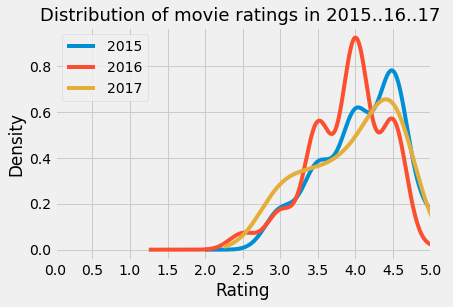

In [9]:
plt.style.use('fivethirtyeight')
df_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
df_2016['fandango'].plot.kde(label = '2016', legend = True)
df_2017['fandango'].plot.kde(label = '2017', legend = True)
plt.title('Distribution of movie ratings in 2015..16..17 ', size = 18)
plt.xlabel('Rating')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

So, obviosly rating distribution is changing through the years. In 2015 it is shifted to the right (figures rounded to the up). In 2016 the distribution looks normal. Rating in 2017 similar to 2015, but there are no peaks every 0.5 point. Lets compare  absolute figures. 

([<matplotlib.axis.XTick at 0x26da6946470>,
 <a list of 11 Text xticklabel objects>)

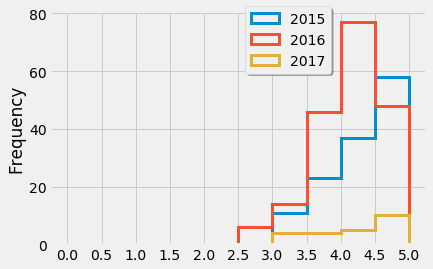

In [10]:
df_2015['Fandango_Stars'].plot.hist(histtype = 'step', label = '2015', legend = True, range = (0,5), bins = 10, linewidth = 3)
df_2016['fandango'].plot.hist(histtype = 'step', label = '2016', legend = True, range = (0,5), bins = 10, linewidth = 3)
df_2017['fandango'].plot.hist(histtype = 'step', label = '2017', legend = True, range = (0,5), bins = 10, linewidth = 3)
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05), ncol=1,
            fancybox=True, shadow=True)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

So, we confirmed clear difference between distributions. Lets compute some metrics of the data: median, mean, mode

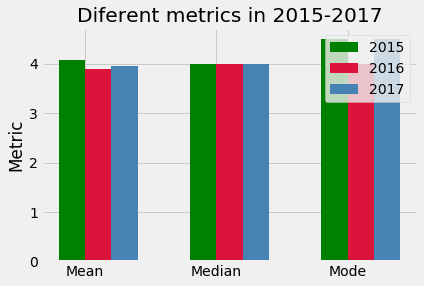

In [11]:
df_2015_mean = df_2015['Fandango_Stars'].mean()
df_2015_median = df_2015['Fandango_Stars'].median()
df_2015_mode = float(df_2015['Fandango_Stars'].mode())


df_2016_mean = df_2016['fandango'].mean()
df_2016_median = df_2016['fandango'].median()
df_2016_mode = float(df_2016['fandango'].mode())

df_2017_mean = df_2017['fandango'].mean()
df_2017_median = df_2017['fandango'].median()
df_2017_mode = float(df_2017['fandango'].mode())


Fandango_Stats = pd.DataFrame( 
                                {
                                 "2015": [df_2015_mean, df_2015_median, df_2015_mode], 
                                 "2016": [df_2016_mean, df_2016_median, df_2016_mode],
                                 "2017": [df_2017_mean, df_2017_median, df_2017_mode]
                                }, 
                               index = ['mean', 'median', 'mode']
)

Fandango_Stats.head()


ind = np.arange(3) 
width = 0.2       
plt.bar(ind, Fandango_Stats['2015'], color = '#008000', width = 0.2, label= '2015')
plt.bar(ind + width, Fandango_Stats['2016'], color = '#DC143C', width = 0.2, label='2016')
plt.bar(ind + width*2, Fandango_Stats['2017'], color = '#4682B4', width = 0.2, label='2017')


plt.ylabel('Metric')
plt.title('Diferent metrics in 2015-2017')

plt.xticks(ind + width / 2, ('Mean', 'Median', 'Mode'))
plt.legend(loc='best')
plt.show()


